## Kabir Hamzah Muhammad & Faisal Farhan

**INFO:** In order to select the best image for our template and the right transformation parameters, we setup an experiment using each image as a template and registering the rest (one vs rest) and using different combinations of parameters from the model zoo. The experiment can be found in ```Lab2_experimental.ipynb```. The idea is to choose the combination that maximizes the segmentation labels (dice score). The result of the experiment is as shown in the table below:


| Parameter file | Best Fixed Image | Average Dice Score |
|-----------|---------|---------|
| Param 9 Affine | Image 1008 | 0.6268 |
| Param 9 Elastic | Image 1013 | 0.45087 |
| Param 9 Affine + Elastic | Image 1017 | **0.7638** |
| Param 9 Affine + Bspline | Image 1008 | 0.7221 |
| Param 21 Affine | Image 1008 | 0.6246 |
| Param 21 Affine + Elastic | Image 1017 | **0.7621** |
| Param 21 Affine + Bspline | Image 1008 | 0.7203 |
| Param Default Affine | Image 1013 | 0.6202 |
| Param Default Bspline | Image 1008 | 0.7227 |



# Libraries

In [1]:
import itk
from tqdm import tqdm
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import os
import SimpleITK as sitk
from tqdm import tqdm
import seaborn as sns
from pathlib import Path
from typing import List

# Registration of Images and Labels

In [ ]:
folder_path = 'training-set/training-images/'
output_path = 'registered_images/'

os.makedirs(output_path, exist_ok=True)

fixed_image = itk.imread('training-set/training-images/1017.nii.gz', itk.F)
files_to_process = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(('.nii', '.nii.gz')) and f != '1017.nii.gz']
with tqdm(total=len(files_to_process), desc="Registration Progress") as pbar:
    for file_name in files_to_process:
        moving_image = itk.imread(file_name, itk.F)
        parameter_object = itk.ParameterObject.New()
        parameter_object.AddParameterFile("parameters/9/Parameters.Par0009.affine.txt")
        parameter_object.AddParameterFile("parameters/9/Parameters.Par0009.elastic.txt")
        result_image, result_transform_parameters = itk.elastix_registration_method(
            fixed_image, moving_image,
            parameter_object=parameter_object,
            log_to_console=False)
        # Extract the folder name and create a directory for each document
        folder_name = file_name.split('.')[0]
        name = folder_name.split('/')[-1]
        output_folder = os.path.join(output_path, name)
        os.makedirs(output_folder, exist_ok=True)
        print(f"Saving output to {output_folder}")
        itk.imwrite(result_image, output_folder + '/result.nii.gz')

        # Save custom parameter map
        parameter_object.WriteParameterFile(result_transform_parameters, [os.path.join(output_folder, 'parameters.txt'), os.path.join(output_folder, 'parameters_elastic.txt')])
        # Print the filenames of the fixed, moving, and registered images
        print("Fixed Image: 1017.nii.gz")
        print(f"Moving Image: {file_name}")
        print(f"Registered Image: result_{file_name}")

        # Visualize the registered image and the corresponding moving image
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 3, 1)
        plt.imshow(itk.GetArrayFromImage(fixed_image)[150], cmap='gray')  
        plt.title('Fixed Image')

        plt.subplot(1, 3, 2)
        plt.imshow(itk.GetArrayFromImage(moving_image)[150], cmap='gray') 
        plt.title('Moving Image')

        plt.subplot(1, 3, 3)
        plt.imshow(itk.GetArrayFromImage(result_image)[150], cmap='gray') 
        plt.title('Registered Image')
        plt.show()
        pbar.update(1)


Transformation Progress:   0%|          | 0/14 [00:00<?, ?it/s]

Transformed label saved to registered_labels/1000_3C.nii.gz


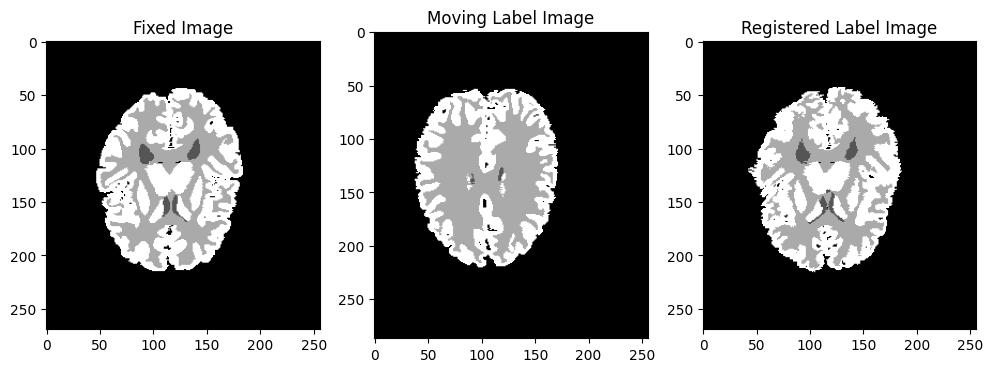

Transformation Progress:   7%|▋         | 1/14 [00:02<00:36,  2.84s/it]

Transformed label saved to registered_labels/1001_3C.nii.gz


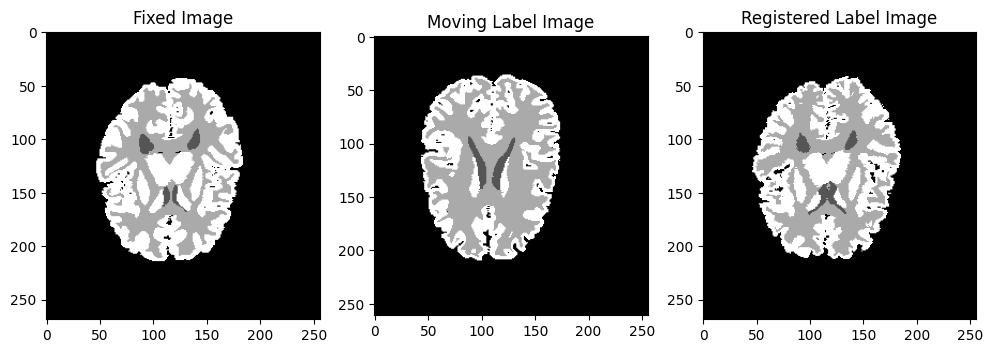

Transformation Progress:  14%|█▍        | 2/14 [00:05<00:33,  2.80s/it]

Transformed label saved to registered_labels/1002_3C.nii.gz


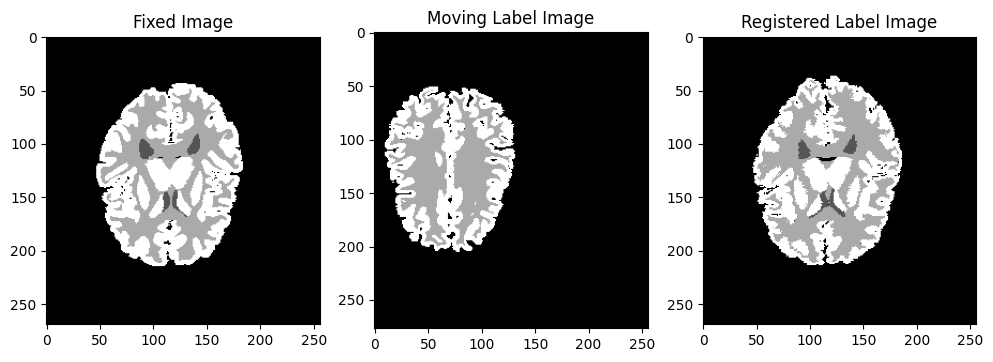

Transformation Progress:  21%|██▏       | 3/14 [00:08<00:30,  2.80s/it]

Transformed label saved to registered_labels/1006_3C.nii.gz


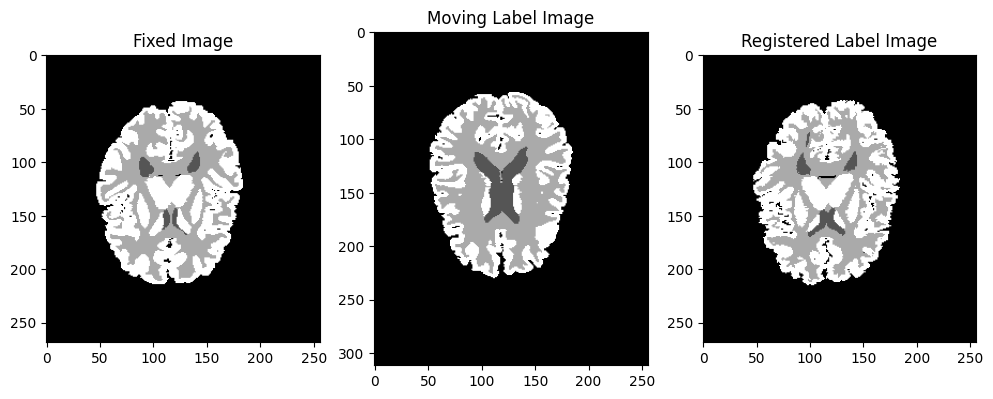

Transformation Progress:  29%|██▊       | 4/14 [00:11<00:27,  2.76s/it]

Transformed label saved to registered_labels/1007_3C.nii.gz


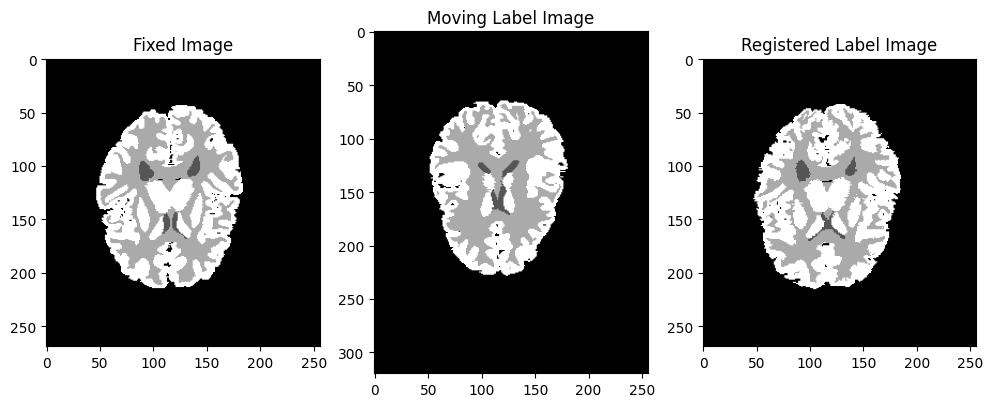

Transformation Progress:  36%|███▌      | 5/14 [00:13<00:24,  2.74s/it]

Transformed label saved to registered_labels/1008_3C.nii.gz


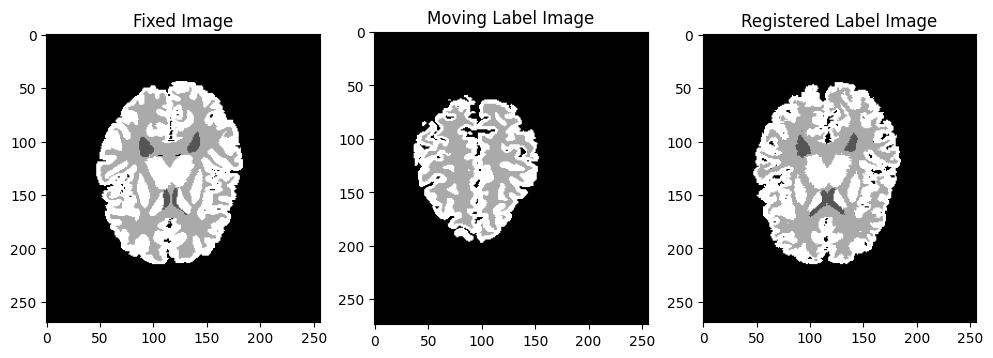

Transformation Progress:  43%|████▎     | 6/14 [00:16<00:21,  2.70s/it]

Transformed label saved to registered_labels/1009_3C.nii.gz


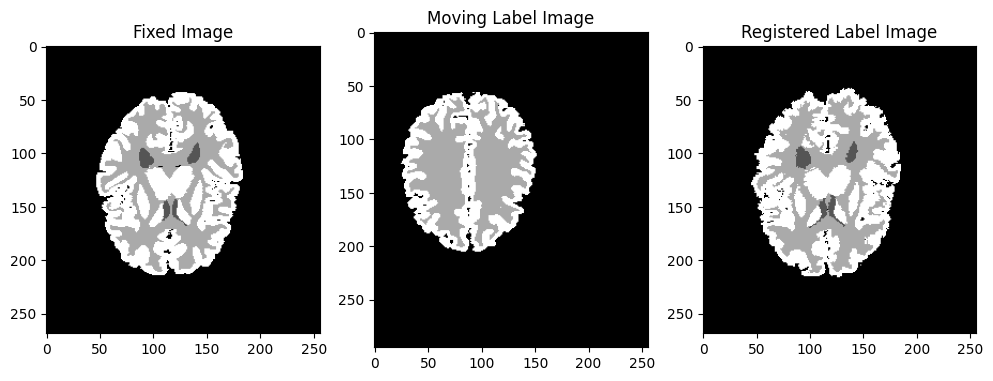

Transformation Progress:  50%|█████     | 7/14 [00:19<00:18,  2.70s/it]

Transformed label saved to registered_labels/1010_3C.nii.gz


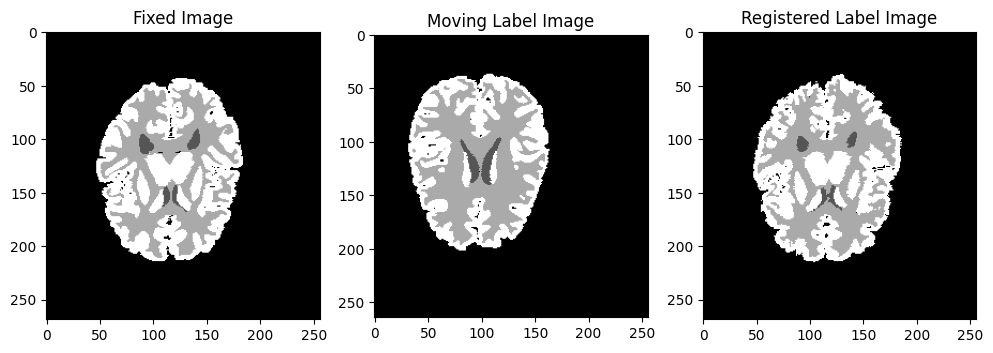

Transformation Progress:  57%|█████▋    | 8/14 [00:22<00:16,  2.77s/it]

Transformed label saved to registered_labels/1011_3C.nii.gz


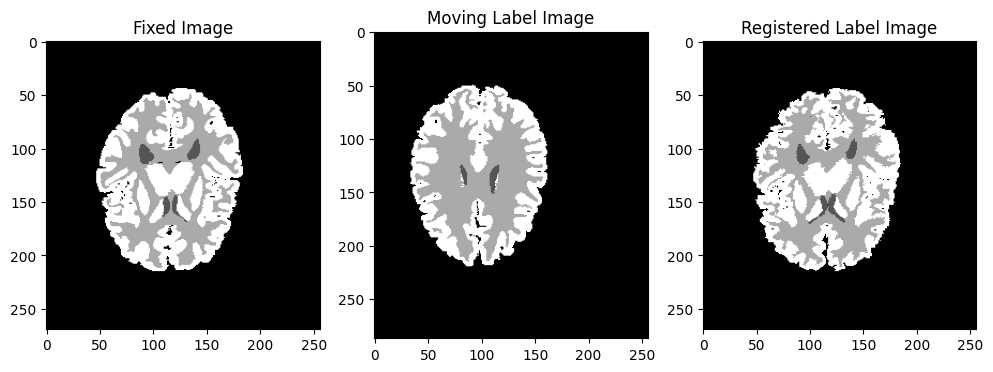

Transformation Progress:  64%|██████▍   | 9/14 [00:24<00:13,  2.74s/it]

Transformed label saved to registered_labels/1012_3C.nii.gz


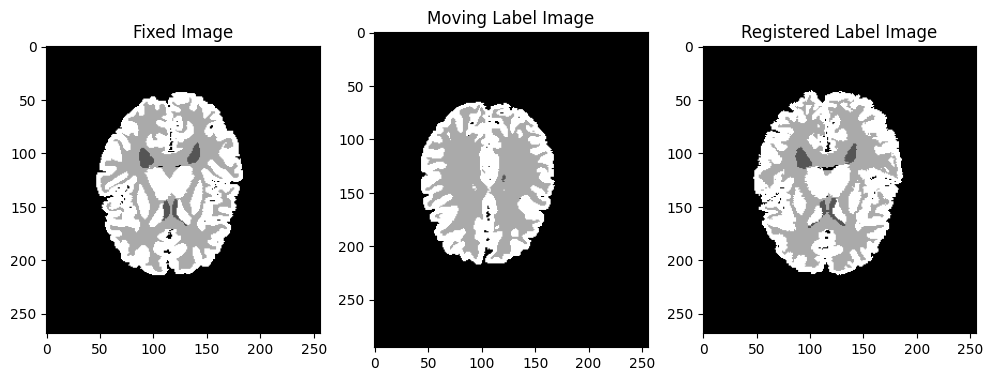

Transformation Progress:  71%|███████▏  | 10/14 [00:27<00:10,  2.72s/it]

Transformed label saved to registered_labels/1013_3C.nii.gz


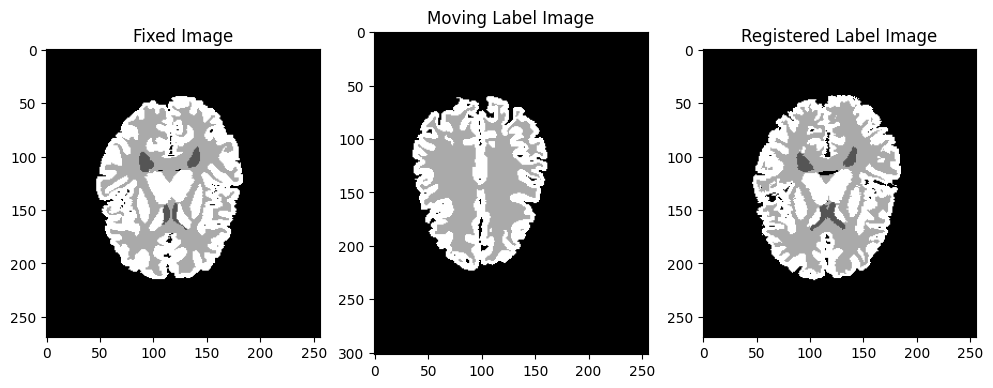

Transformation Progress:  79%|███████▊  | 11/14 [00:30<00:08,  2.71s/it]

Transformed label saved to registered_labels/1014_3C.nii.gz


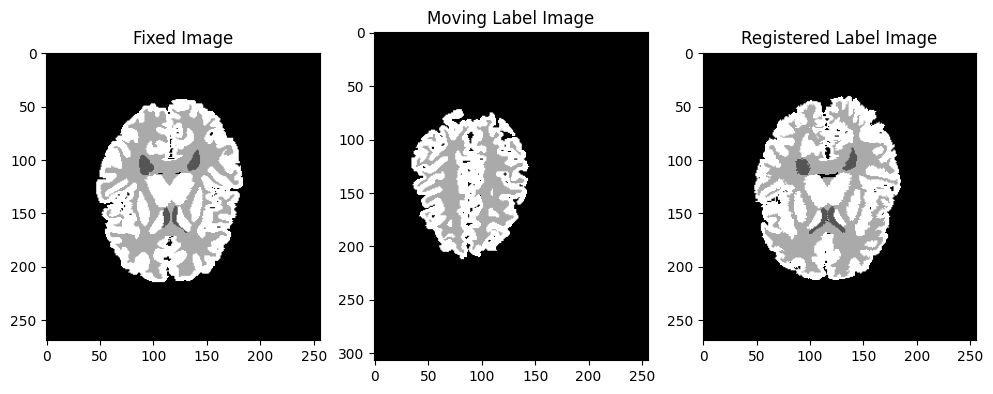

Transformation Progress:  86%|████████▌ | 12/14 [00:32<00:05,  2.71s/it]

Transformed label saved to registered_labels/1015_3C.nii.gz


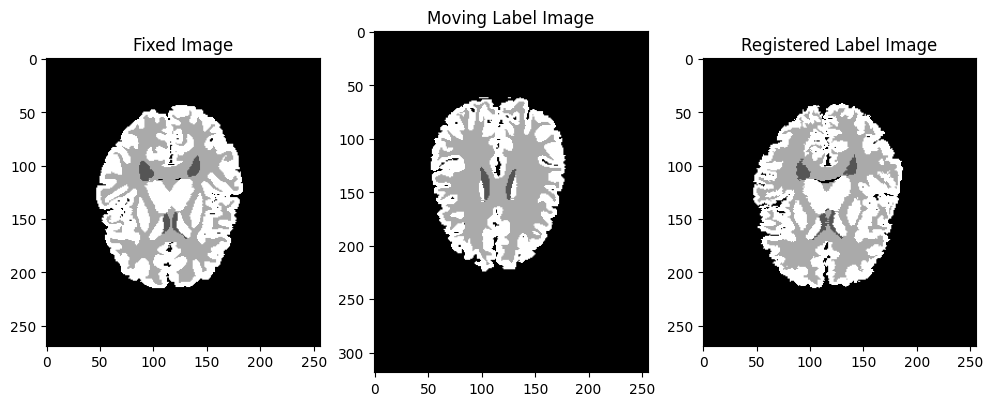

Transformation Progress:  93%|█████████▎| 13/14 [00:35<00:02,  2.72s/it]

Transformed label saved to registered_labels/1036_3C.nii.gz


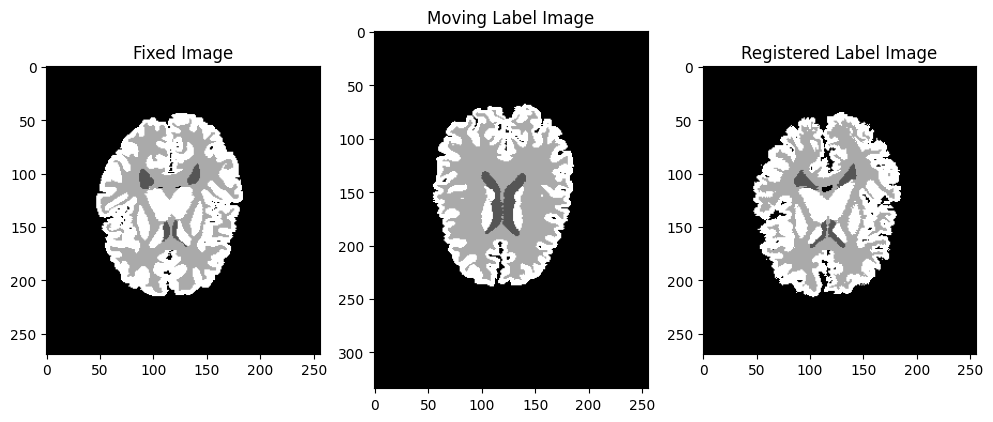

Transformation Progress: 100%|██████████| 14/14 [00:38<00:00,  2.73s/it]


In [3]:
registered_images_path = 'registered_images/'
registered_labels_path = 'registered_labels/'
labels_path = 'training-set/training-labels/'
os.makedirs(registered_labels_path, exist_ok=True)
fixed_image = itk.imread("training-set/training-labels/1017_3C.nii.gz", itk.F)
transformix_image_filter = itk.TransformixFilter.New()
# Iterate through the registered image folders
for folder_name in tqdm(os.listdir(registered_images_path), desc="Transformation Progress"):
    folder_path = os.path.join(registered_images_path, folder_name)
    # Construct the label file name by adding "_3C" to the folder name
    label_name = folder_name + "_3C.nii.gz"
    # Check if the label file exists in the original labels directory and load
    label_file_path = os.path.join(labels_path, label_name)
    if os.path.exists(label_file_path):
        label_image = itk.imread(label_file_path, itk.F)
        # Load the transformation parameters from the folder
        param_file_path = os.path.join(folder_path, 'parameters.txt')
        param_file_path_elastic = os.path.join(folder_path, 'parameters_elastic.txt')
        # Create a parameter map and set the transform parameters
        parameter_map = itk.ParameterObject.New()
        parameter_map.AddParameterFile(param_file_path)
        parameter_map.AddParameterFile(param_file_path_elastic)
        # change the interpolation type to nearest neighbor
        parameter_map.SetParameter("ResampleInterpolator", ["FinalNearestNeighborInterpolator"])

        # Get the transformed label image
        transformed_label_image = itk.transformix_filter(label_image, parameter_map)
        # Save the transformed label image to the new directory
        transformed_label_path = os.path.join(registered_labels_path, label_name)
        itk.imwrite(transformed_label_image, transformed_label_path)
        print(f"Transformed label saved to {transformed_label_path}")
        
        # Visualize the registered image and the corresponding moving image
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 3, 1)
        plt.imshow(itk.GetArrayFromImage(fixed_image)[150], cmap='gray')
        plt.title('Fixed Image')

        plt.subplot(1, 3, 2)
        plt.imshow(itk.GetArrayFromImage(label_image)[150], cmap='gray')
        plt.title('Moving Label Image')

        plt.subplot(1, 3, 3)
        plt.imshow(itk.GetArrayFromImage(transformed_label_image)[150], cmap='gray')  
        plt.title('Registered Label Image')

        plt.show()
    else:
        print(f"Label file for folder {folder_name} not found.")
        
        pbar.update(1)

Dice Coefficient Progress:   7%|▋         | 1/14 [00:00<00:06,  2.07it/s]

Dice Coefficient between fixed and registered labels: 0.799303356529471


Dice Coefficient Progress:  14%|█▍        | 2/14 [00:00<00:05,  2.12it/s]

Dice Coefficient between fixed and registered labels: 0.769780929748181


Dice Coefficient Progress:  21%|██▏       | 3/14 [00:01<00:05,  2.10it/s]

Dice Coefficient between fixed and registered labels: 0.7779579561642257


Dice Coefficient Progress:  29%|██▊       | 4/14 [00:01<00:04,  2.15it/s]

Dice Coefficient between fixed and registered labels: 0.7171281839346273


Dice Coefficient Progress:  36%|███▌      | 5/14 [00:02<00:04,  2.15it/s]

Dice Coefficient between fixed and registered labels: 0.7322842537592368


Dice Coefficient Progress:  43%|████▎     | 6/14 [00:02<00:03,  2.17it/s]

Dice Coefficient between fixed and registered labels: 0.7646006463306614


Dice Coefficient Progress:  50%|█████     | 7/14 [00:03<00:03,  2.19it/s]

Dice Coefficient between fixed and registered labels: 0.7984350451064837


Dice Coefficient Progress:  57%|█████▋    | 8/14 [00:03<00:02,  2.21it/s]

Dice Coefficient between fixed and registered labels: 0.7360172737780868


Dice Coefficient Progress:  64%|██████▍   | 9/14 [00:04<00:02,  2.21it/s]

Dice Coefficient between fixed and registered labels: 0.7422204681155402


Dice Coefficient Progress:  71%|███████▏  | 10/14 [00:04<00:01,  2.21it/s]

Dice Coefficient between fixed and registered labels: 0.7339837071060383


Dice Coefficient Progress:  79%|███████▊  | 11/14 [00:05<00:01,  2.21it/s]

Dice Coefficient between fixed and registered labels: 0.7427763184267304


Dice Coefficient Progress:  86%|████████▌ | 12/14 [00:05<00:00,  2.15it/s]

Dice Coefficient between fixed and registered labels: 0.7544228774409714


Dice Coefficient Progress:  93%|█████████▎| 13/14 [00:06<00:00,  2.10it/s]

Dice Coefficient between fixed and registered labels: 0.7962661039993522


Dice Coefficient Progress: 100%|██████████| 14/14 [00:06<00:00,  2.14it/s]

Dice Coefficient between fixed and registered labels: 0.6800621550479542


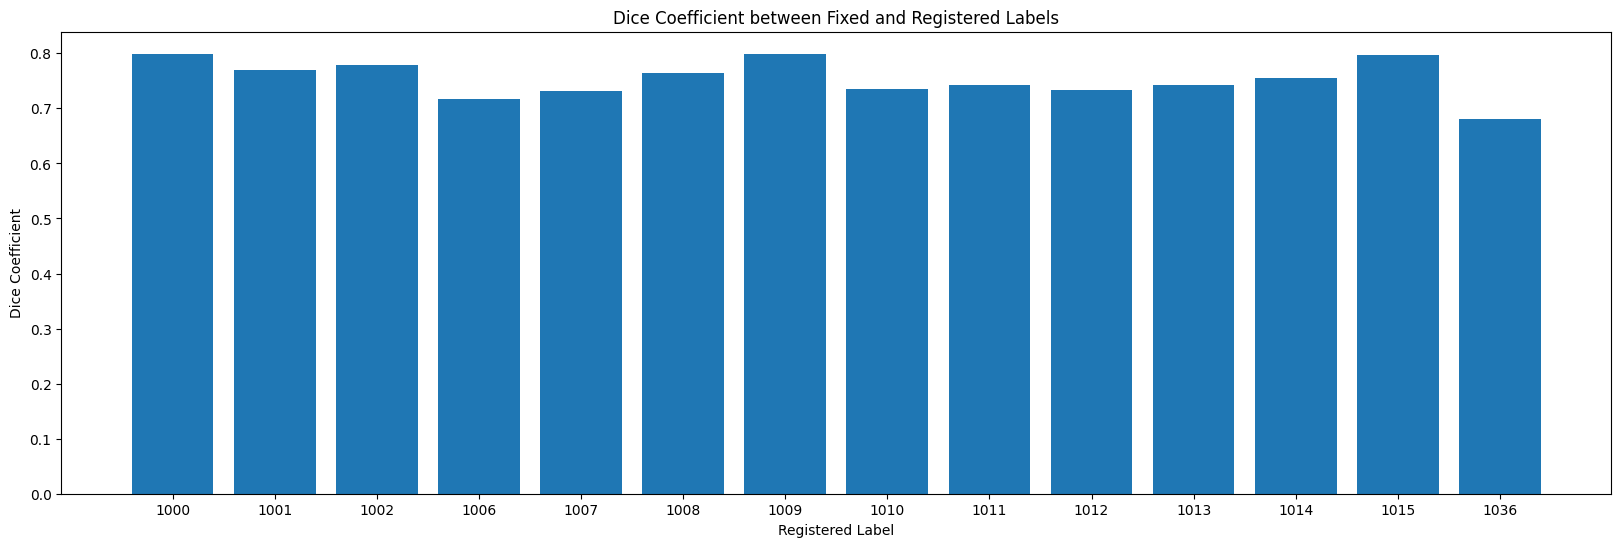

In [4]:
def calculate_dice_coefficient(fixed_label: itk.Image, registered_label: itk.Image) -> float:  
    fixed_array = itk.GetArrayFromImage(fixed_label)
    registered_array = itk.GetArrayFromImage(registered_label)
    # Ensure binary labels
    dice=0
    for cls in [1,2,3]:
        fixed_array = (fixed_array == cls).astype(int)
        registered_array = (registered_array == cls).astype(int)
        intersection = np.sum(fixed_array * registered_array)
        sum_fixed = np.sum(fixed_array)
        sum_registered = np.sum(registered_array)
        dice += (2.0 * intersection) / (sum_fixed + sum_registered + 1e-6) 
    return dice

fixed_label = itk.imread('training-set/training-labels/1017_3C.nii.gz', itk.F)
all_files = [os.path.join(registered_labels_path, f) for f in os.listdir(registered_labels_path)]
all_files = [f.split('/')[-1] for f in all_files]
all_files = [f.split('_3C')[0] for f in all_files]
dice_coefficients = []
for label_name in tqdm(os.listdir(registered_labels_path), desc="Dice Coefficient Progress"):
    registered_label = itk.imread(os.path.join(registered_labels_path, label_name), itk.F)
    dice_coefficient = calculate_dice_coefficient(fixed_label, registered_label)
    dice_coefficients.append(dice_coefficient)
    print(f"Dice Coefficient between fixed and registered labels: {dice_coefficient}")
    
# Plot the dice coefficients
plt.figure(figsize=(20, 6))
plt.bar(all_files, dice_coefficients)
plt.xlabel('Registered Label')
plt.ylabel('Dice Coefficient')
plt.title('Dice Coefficient between Fixed and Registered Labels')
plt.show()

# Tissue Models

In [2]:
image_directory = "training-set/training-images/"
label_directory = "training-set/training-labels/"
output_directory = "output/"
reference_image_path = "training-set/training-images/1017.nii.gz"

In [3]:
def load_and_process_images(image_directory, label_directory):
    """Load and process multiple images efficiently."""
    class_lists = {1: [], 2: [], 3: []}  # Initialize dict for 3 tissue types
    
    # Get all image files
    image_files = [f for f in os.listdir(image_directory) if f.endswith('.nii.gz')]
    
    # Process each image and its corresponding label
    for image_file in tqdm(image_files, total=len(image_files)):
        image_name = os.path.splitext(os.path.splitext(image_file)[0])[0]
        image_filepath = os.path.join(image_directory, image_file)
        label_filepath = os.path.join(label_directory, f'{image_name}_3C.nii.gz')
        
        # Load and normalize image
        img = sitk.GetArrayFromImage(sitk.ReadImage(image_filepath))
        lab = sitk.GetArrayFromImage(sitk.ReadImage(label_filepath))
        
        for class_id in class_lists.keys():
            class_lists[class_id].extend(img[lab == class_id].tolist())
    
    return class_lists

def calculate_probabilities(class_lists, class_labels):
    """Calculate probability distributions for each tissue type."""
    
    all_values = sorted(set().union(*class_lists.values()))

    # Count occurrences of each intensity value for each class
    class_counts = {class_id: Counter(class_lists[class_id]) for class_id in class_lists}

    # Calculate probabilities for each class
    probabilities = {label: [] for label in class_labels.values() if label != 'background'}
    for value in all_values:
        total_count = sum(class_counts[class_id][value] for class_id in class_lists)
        for class_id, label in class_labels.items():
            if class_id != 0:  # Skip background
                probabilities[label].append(class_counts[class_id][value] / total_count if total_count > 0 else 0)
    
    return all_values, probabilities

def plot_tissue_model(all_values, probabilities):
    """Plot the tissue model distributions."""
    plt.figure(figsize=(10, 6))
    
    colors = {'CSF': 'orange', 'GM': 'green', 'WM': 'red'}
    labels = {'CSF': 'CSF', 'GM': 'GM', 'WM': 'WM'}
    
    x = np.arange(len(all_values))
    for tissue_type, probs in probabilities.items():

        plt.plot(x, probs, label=labels[tissue_type], color=colors[tissue_type])
    
    plt.xlabel('Intensity values')
    plt.ylabel('Probability of Belonging to Each Class')
    plt.title('Tissue Model')
    plt.xticks(np.arange(0, len(all_values), 200))
    plt.legend()
    plt.show()


100%|██████████| 15/15 [00:08<00:00,  1.74it/s]


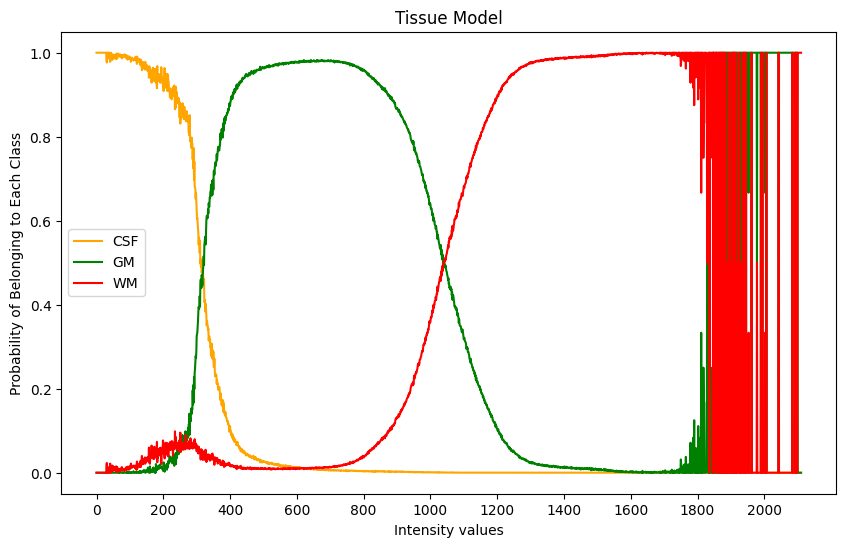

In [4]:
class_labels = {0: 'background', 1: 'CSF', 3: 'GM', 2: 'WM'}
tissue_data = load_and_process_images(image_directory, label_directory)
all_values, probabilities = calculate_probabilities(tissue_data, class_labels=class_labels)
plot_tissue_model(all_values, probabilities)

# ATLAS

In [6]:
image_directory = "registered_images/"
label_directory = "registered_labels/"
output_directory = "Atlas_images/"
reference_image_path = "training-set/training-images/1017.nii.gz"
num_classes = 4
reference_image = sitk.ReadImage(str(reference_image_path))
reference_image_array = sitk.GetArrayFromImage(reference_image)

num_volumes = len(os.listdir(label_directory))
reference_shape = reference_image_array.shape
class_labels = {0: 'background', 1: 'csf', 2: 'wm', 3: 'gm'}

# Create accumulators
atlases = np.zeros((num_classes, *reference_shape)).astype('float32')
mean_volume = np.zeros_like(reference_image_array).astype('float32')

for folder_name in tqdm(os.listdir(image_directory), desc="Processing images"):
    folder_path = os.path.join(image_directory, folder_name)
    image_name = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(('.nii', '.nii.gz'))][0]
    print(f"Processing {image_name}")
    label_name = f'{folder_name}_3C.nii.gz'

    # Mean image
    images = sitk.GetArrayFromImage(sitk.ReadImage(str(image_name)))
    images = (images - images.min()) / (images.max() - images.min()) * 255
    mean_volume += images / num_volumes

    # Probabilistic atlas image
    label_images = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(label_directory, label_name)))
    for c in range(num_classes):
        atlases[c] += np.where(label_images == c, 1, 0) / num_volumes

# Top Atlas
topological_atlas = np.argmax(atlases, axis=0)

def save_image(data, path, reference_image):
    image = sitk.GetImageFromArray(data)
    image.CopyInformation(reference_image)
    sitk.WriteImage(image, str(path))

# Save probability atlases
for c in range(num_classes):
    save_image(atlases[c], f'./{output_directory}probability_atlas_{class_labels[c]}.nii.gz', reference_image)

# Save the topological atlas
save_image(topological_atlas, f'./{output_directory}topological_atlas.nii.gz', reference_image)

# Save the mean volume
save_image(mean_volume,f'./{output_directory}mean_volume.nii.gz', reference_image)

Processing images:   0%|          | 0/14 [00:00<?, ?it/s]

Processing registered_images/1000\result.nii.gz


Processing images:   7%|▋         | 1/14 [00:00<00:12,  1.07it/s]

Processing registered_images/1001\result.nii.gz


Processing images:  14%|█▍        | 2/14 [00:01<00:11,  1.06it/s]

Processing registered_images/1002\result.nii.gz


Processing images:  21%|██▏       | 3/14 [00:02<00:10,  1.06it/s]

Processing registered_images/1006\result.nii.gz


Processing images:  29%|██▊       | 4/14 [00:03<00:09,  1.06it/s]

Processing registered_images/1007\result.nii.gz


Processing images:  36%|███▌      | 5/14 [00:04<00:08,  1.04it/s]

Processing registered_images/1008\result.nii.gz


Processing images:  43%|████▎     | 6/14 [00:05<00:07,  1.01it/s]

Processing registered_images/1009\result.nii.gz


Processing images:  50%|█████     | 7/14 [00:06<00:06,  1.02it/s]

Processing registered_images/1010\result.nii.gz


Processing images:  57%|█████▋    | 8/14 [00:07<00:05,  1.02it/s]

Processing registered_images/1011\result.nii.gz


Processing images:  64%|██████▍   | 9/14 [00:08<00:04,  1.01it/s]

Processing registered_images/1012\result.nii.gz


Processing images:  71%|███████▏  | 10/14 [00:09<00:03,  1.00it/s]

Processing registered_images/1013\result.nii.gz


Processing images:  79%|███████▊  | 11/14 [00:10<00:02,  1.02it/s]

Processing registered_images/1014\result.nii.gz


Processing images:  86%|████████▌ | 12/14 [00:11<00:01,  1.03it/s]

Processing registered_images/1015\result.nii.gz


Processing images:  93%|█████████▎| 13/14 [00:12<00:00,  1.04it/s]

Processing registered_images/1036\result.nii.gz


Processing images: 100%|██████████| 14/14 [00:13<00:00,  1.03it/s]


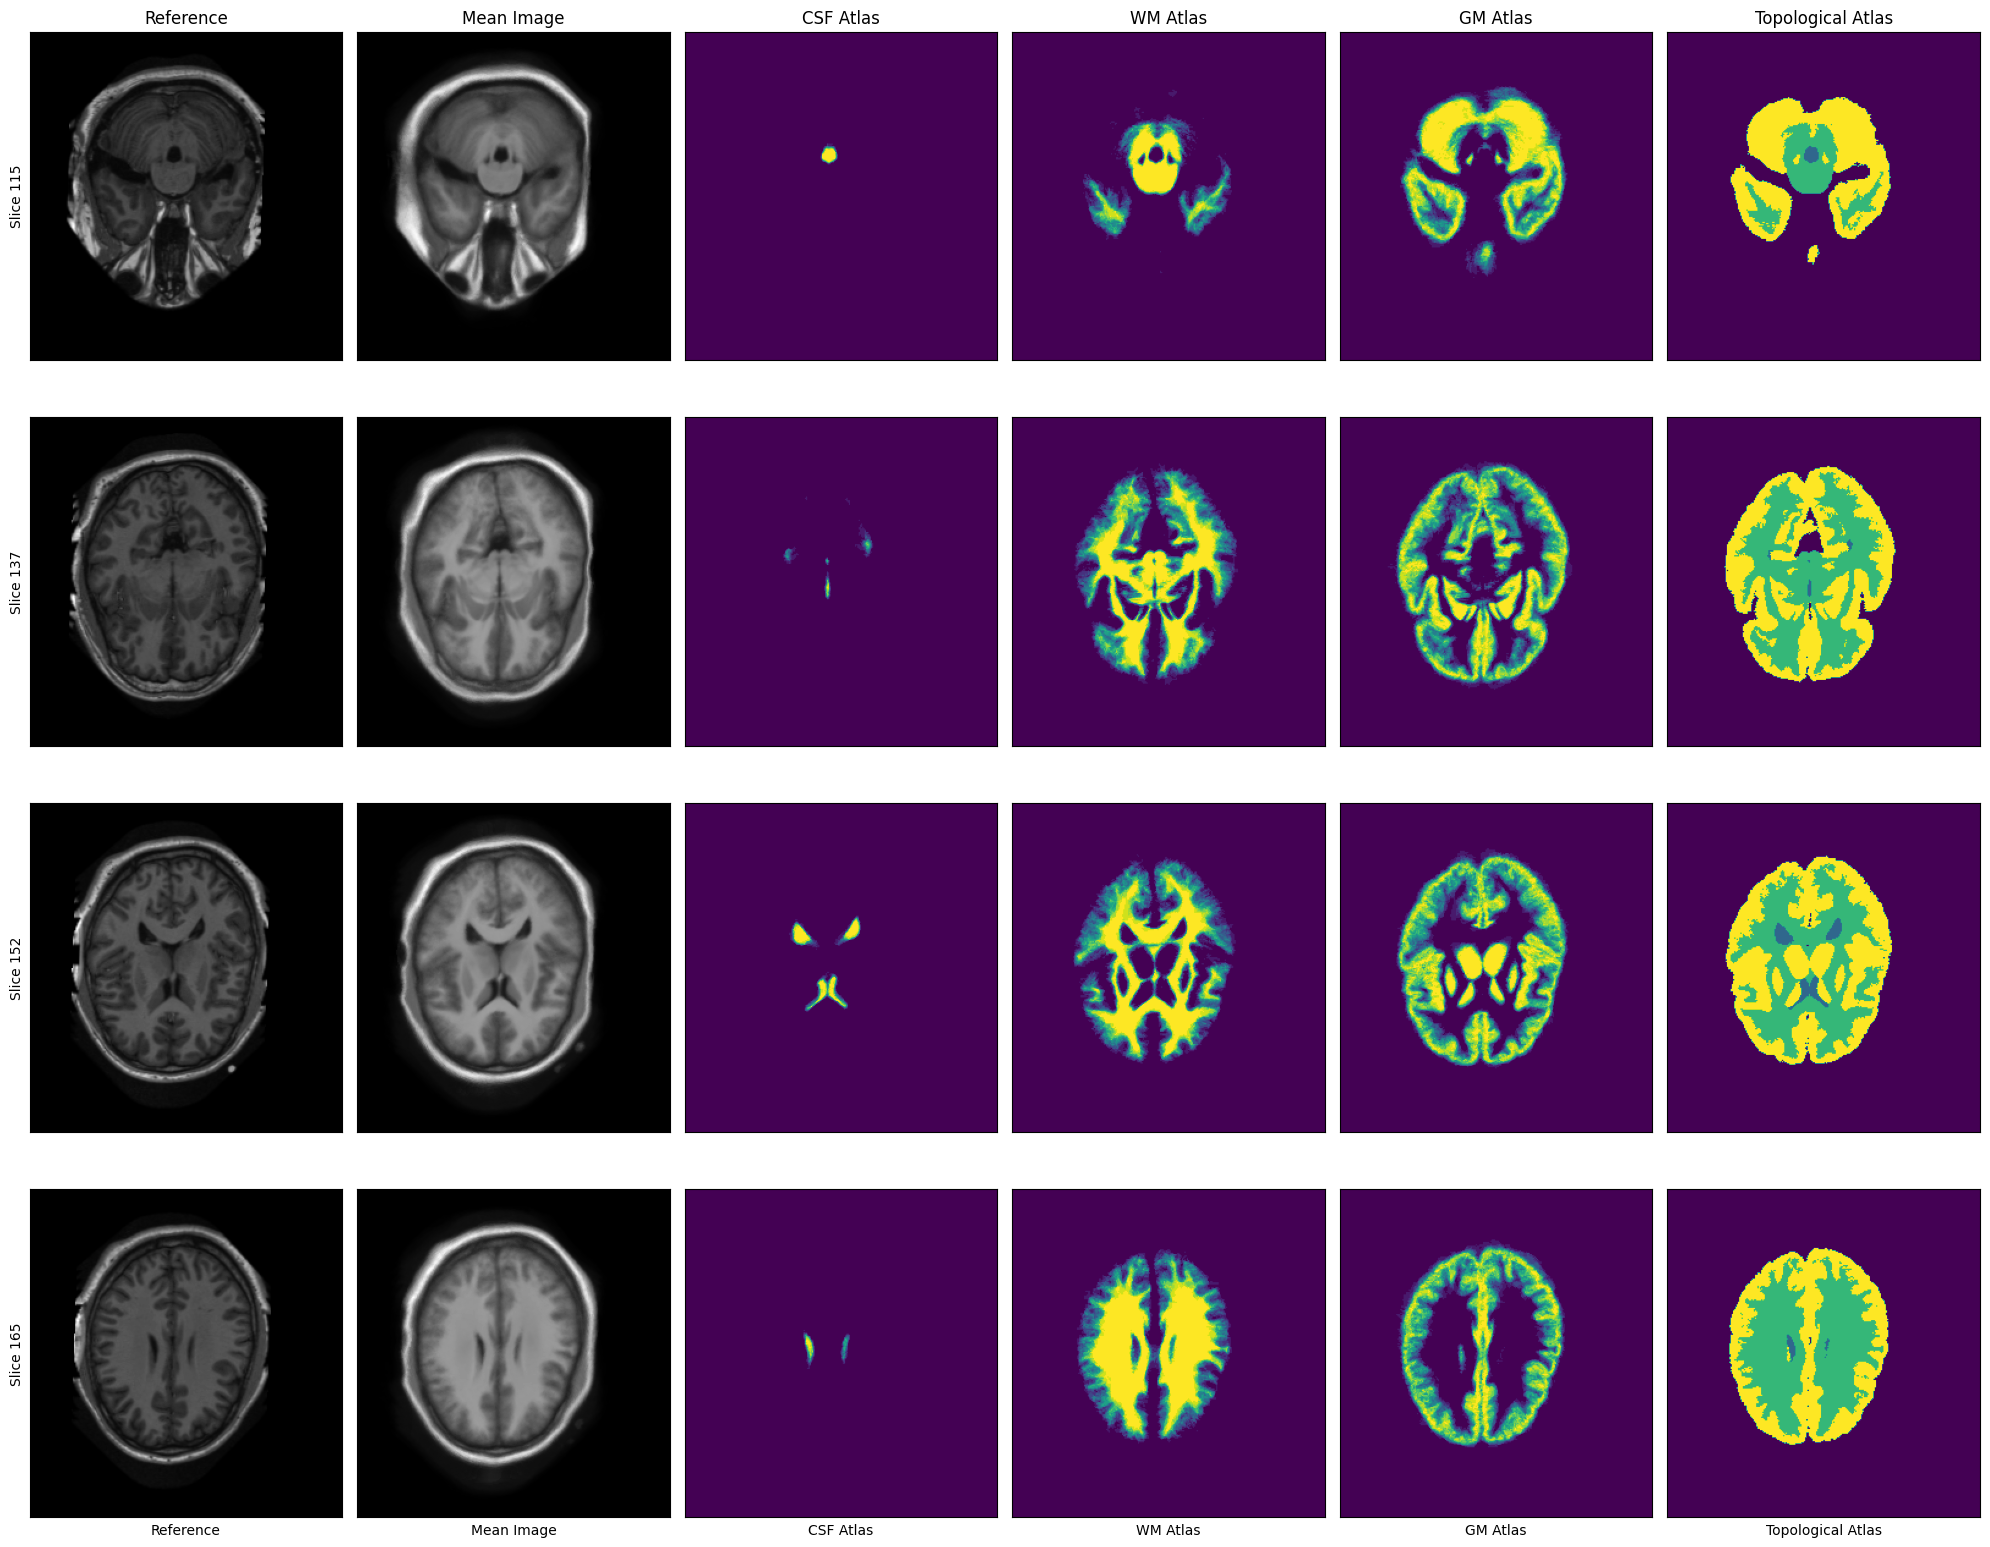

In [7]:
def plot_slices(data_path: Path, img_names: List[str], titles: List[str], slices_to_plot: List[int]):
    fig, axes = plt.subplots(len(slices_to_plot), len(img_names), figsize=(20, 4*len(slices_to_plot)))
    
    for i, slice_n in enumerate(slices_to_plot):
        for j, (img_name, title) in enumerate(zip(img_names, titles)):
            img = sitk.ReadImage(str(data_path / img_name))
            img_array = sitk.GetArrayFromImage(img)
            
            ax = axes[i, j] if len(slices_to_plot) > 1 else axes[j]
            
            if j in [0, 1]:
                ax.imshow(img_array[slice_n], cmap='gray')
            else:
                ax.imshow(img_array[slice_n])
            
            ax.set_xticks([])
            ax.set_yticks([])
            
            if i == 0:
                ax.set_title(title)
            if i == len(slices_to_plot) - 1:
                ax.set_xlabel(title)
            if j == 0:
                ax.set_ylabel(f'Slice {slice_n}')
    
    plt.tight_layout()
    plt.show()

# Usage
slices_to_plot = [115, 137, 152, 165]
image_directory = Path("Atlas_images") 
img_names = [
    '1017.nii.gz',
    'mean_volume.nii.gz',
    'probability_atlas_csf.nii.gz',
    'probability_atlas_wm.nii.gz',
    'probability_atlas_gm.nii.gz',
    'topological_atlas.nii.gz'
]
titles = [
    'Reference',
    'Mean Image',
    'CSF Atlas',
    'WM Atlas',
    'GM Atlas',
    'Topological Atlas'
]

plot_slices(image_directory, img_names, titles, slices_to_plot)